In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris

In [5]:
pwd

'/Users/liliying/Galvanize/instagram_fake_followers_detector'

In [6]:
cd src

/Users/liliying/Galvanize/instagram_fake_followers_detector/src


In [87]:
data = pd.read_csv('../data_cleaned.csv')

In [88]:
data.rename({'Unnamed: 0':'follower_id'}, axis = 'columns')

,follower_id,user_name,full_name,num_posts,num_followers,num_followings,is_private,is_business,is_joined_recently,biography,num_followers_float,following_follower_ratio,engagement_rate,label
0,0,wqwqwq12345w,1998,0.0,1,12.0,0,0,1,åÁNi recentid@ ni dolid@ acÌÁ te la bancas_ÙÕ£...,1.0,6.000000,0.0000,0
1,1,soymuyfalsa,soy muy falsa,5.0,62,1.0,0,0,0,0,62.0,0.015873,0.0000,0
2,2,andrea_bordon_,andrea bordon,1.0,132,78.0,0,1,0,25/08/1999Monfalcone-Udine Italy_Ùà¨_Ùà_,132.0,0.586466,0.0000,0
3,3,@ndah.endah.3701,@ndah.endah.3701 _ã¢ Instagram photos and videos,3.0,798,138.0,0,1,0,Haters make me famous_Ù÷È,798.0,0.172716,0.0000,0
4,4,jolsuperstar_tz,jolsuperstartz,66.0,494,195.0,0,0,0,_ÙÓ¡FANSHII NDIO SPECIAL ACCOUNT YANGU KARIBUN...,494.0,0.393939,0.0000,0
5,5,wisnuhdyat33,WisnuHidayat,5.0,552,252.0,0,1,0,PERSIB BANDUNG___Ù÷üBogor Indonesia_Ùà¨_Ùà©,552.0,0.455696,0.0000,0
6,6,adiukulelo87,________ _____ä_____µ__Î__µ__ª,27.0,9438,6989.0,0,0,0,£À _Óà_ÓÂ_ÓÇ_Ó± _Ó±_Ó¢_Ó©_Ó© _Ó__Ó¢...,9438.0,0.740439,0.0325,1
7,7,edupdv04,Eduard Puigdevall,303.0,1705,434.0,0,1,0,Subcamp.Cat. SQ '06CampeÌ_n Cat. SQ '07Subcamp...,1705.0,0.254396,0.0730,0
8,8,segaid98,Sega ID98,17.0,274,210.0,0,0,0,Senggol bacok.Pribadi yang lebih baik _Ùª,274.0,0.763636,0.0000,0
9,9,reza.aliakber,Reza Aliakbar,2.0,75,168.0,0,0,0,0,75.0,2.210526,0.0000,0


Text(0.5,0,'follower')

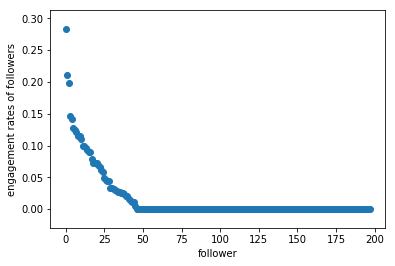

In [62]:
plt.scatter(data['Unnamed: 0'],sorted(data['engagement_rate'], reverse=True))
plt.ylabel('engagement rates of followers')
plt.xlabel('follower')

In [46]:
plt.scatter?

In [15]:
pct_low_er_followers = data[data['label'] == 1].shape[0]/data.shape[0]

In [18]:
pct_low_er_followers

0.10606060606060606

In [24]:
X = data.iloc[:, [3,5,6,7,8,10,11]]

In [82]:
y = data['label']

In [34]:
X.shape

(198, 7)

In [35]:
y.shape

(198,)

### train-test split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 7), (50, 7), (148,), (50,))

### linear regression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred = model.predict(X_test)

In [43]:
y_pred # predict their engagement rate

array([ 0.04536721,  0.01918794,  0.01659516,  0.04057575,  0.01389674,
        0.00029388,  0.00068745,  0.01891585,  0.00048344,  0.01382398,
        0.01683231,  0.06148327,  0.00061841,  0.02575911,  0.04296595,
        0.03876015,  0.00048753,  0.03787426,  0.00062793,  0.01737349,
        0.02467958, -0.01437351,  0.04044303,  0.01619555,  0.06067519,
        0.00132503,  0.05363694,  0.04990836,  0.01528494,  0.00062703,
        0.03287866,  0.01470943,  0.01441388,  0.0156173 ,  0.00116802,
        0.01394341,  0.01437908,  0.00044895,  0.01375659,  0.01372605,
        0.01681535, -0.00073963,  0.00048375,  0.00095776,  0.01565492,
        0.01390984,  0.03360626,  0.05482206,  0.03020001,  0.03691616])

In [72]:
x = np.linspace(0, 49)

In [73]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

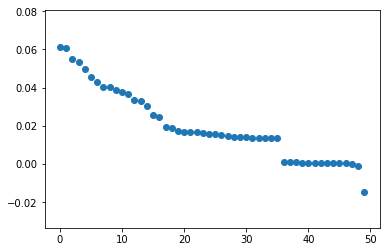

In [75]:
plt.scatter(x, sorted(y_pred, reverse=True))

### logistic regression

In [91]:
model = LogisticRegression()

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 84 to 122
Data columns (total 7 columns):
num_posts                   148 non-null float64
num_followings              148 non-null float64
is_private                  148 non-null int64
 is_business                148 non-null int64
 is_joined_recently         148 non-null int64
num_followers_float         148 non-null float64
following_follower_ratio    148 non-null float64
dtypes: float64(4), int64(3)
memory usage: 9.2 KB


In [93]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
y_pred = model.predict_proba(X_test)

In [95]:
log_loss1 = log_loss(y_test, y_pred)

In [96]:
log_loss1

0.6981216448661424

In [97]:
cv_logloss = -cross_val_score(model, X, y, scoring = 'neg_log_loss', cv = 10).mean()
cv_logloss

0.32261185172152895

### random forest

In [98]:
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [100]:
y_pred = rf.predict_proba(X_test)[:, 1]
y_pred

array([0.22, 0.27, 0.  , 0.43, 0.26, 0.  , 0.  , 0.65, 0.  , 0.  , 0.33,
       0.62, 0.  , 0.53, 0.13, 0.55, 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
       0.3 , 0.  , 0.12, 0.  , 0.12, 0.62, 0.01, 0.  , 0.  , 0.12, 0.01,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.02, 0.12, 0.27, 0.08])

In [101]:
cv_logloss_rf1 = -cross_val_score(rf, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [102]:
cv_logloss_rf1

0.17735862171376354

### Best random forest

In [26]:
random_forest_grid = {'max_depth': [3, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [20, 40, 80, 100],
                      'random_state': [359]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_log_loss')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  1.5min finished


best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 359}


In [27]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=359, verbose=0, warm_start=False)

In [28]:
y_pred_best = best_rf_model.predict_proba(X_test)[:, 1]


In [29]:
y_pred_best

array([2.29754658e-01, 1.93968278e-01, 8.38340291e-03, 3.88620649e-01,
       1.76440354e-01, 3.36408711e-04, 2.96942500e-03, 4.76212985e-01,
       1.14321685e-03, 3.93395463e-03, 2.19760040e-01, 5.84963903e-01,
       1.14321685e-03, 4.54465458e-01, 1.26176090e-01, 4.34407062e-01,
       3.36408711e-04, 1.05622985e-01, 2.96942500e-03, 7.53075378e-04,
       9.33457663e-03, 7.09219858e-05, 2.85011890e-01, 7.07238634e-03,
       2.73237032e-01, 2.96942500e-03, 1.26940478e-01, 4.76174573e-01,
       4.60663808e-02, 1.14321685e-03, 6.43593945e-03, 6.16790247e-02,
       1.51728138e-02, 6.53155106e-03, 2.96942500e-03, 2.80456585e-03,
       1.16720499e-02, 1.14321685e-03, 2.80456585e-03, 3.38148893e-03,
       8.38340291e-03, 2.38642313e-03, 1.14321685e-03, 2.73132976e-03,
       1.43339964e-02, 3.04266109e-03, 4.29834000e-02, 1.46706493e-01,
       1.65747722e-01, 1.32951143e-01])

In [30]:
cv_logloss_rf2 = -cross_val_score(best_rf_model, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [31]:
cv_logloss_rf2

0.18128442265286898

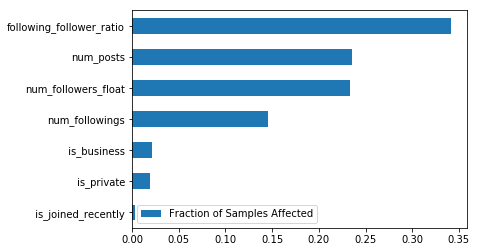

In [32]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

### predict proba given a username

In [34]:
pwd

'/Users/liliying/Galvanize/instagram_fake_followers_detector'

In [35]:
cd src

/Users/liliying/Galvanize/instagram_fake_followers_detector/src


In [36]:
from get_new_feature import get_new_features

In [37]:
from DataPreparation import get_info

In [38]:
url = 'https://www.instagram.com/lilylii818/'

In [39]:
get_info(url)

('lilylii818', 'Liying (Lily) Li ', '90', '128', '116')

In [40]:
get_new_features(url)

(True, False, False, 'Decision making.')

In [41]:
one_user = []

In [42]:
for item in get_info(url):
    one_user.append(item)
for feature in get_new_features(url):
    one_user.append(feature)

In [43]:
one_user_df = pd.DataFrame(np.array(one_user).reshape(1,-1))

In [44]:
one_user_df['num_followers_float'] = one_user_df.apply(lambda row: float(row[3].replace('k', 'e3').replace('m', 'e6')), axis=1)

In [45]:
one_user_df

,0,1,2,3,4,5,6,7,8,num_followers_float
0,lilylii818,Liying (Lily) Li,90,128,116,True,False,False,Decision making.,128.0


In [46]:
one_user_df['num_followers_float']

0    128.0
Name: num_followers_float, dtype: float64

In [47]:
one_user_df['following_follower_ratio'] = float(one_user_df[4]) / (float(one_user_df['num_followers_float']) +1)


In [48]:
one_user_df = one_user_df.drop(8, axis = 1)

In [49]:
one_user_df

,0,1,2,3,4,5,6,7,num_followers_float,following_follower_ratio
0,lilylii818,Liying (Lily) Li,90,128,116,True,False,False,128.0,0.899225


In [50]:
one_user_df.iloc[:,5]

0    True
Name: 5, dtype: object

In [51]:
#data_no_nan.iloc[:,6] = data_no_nan.iloc[:,6].astype(int)
one_user_df.iloc[0,5] = [1 if one_user_df.iloc[0,5] == 'True' else 0]
one_user_df.iloc[0,6] = [1 if one_user_df.iloc[0,6] == 'True' else 0]
one_user_df.iloc[0,7] = [1 if one_user_df.iloc[0,7] == 'True' else 0]

In [52]:
one_user_df.iloc[:,[2,4,5,6,7,8,9]]

,2,4,5,6,7,num_followers_float,following_follower_ratio
0,90,116,1,0,0,128.0,0.899225


In [53]:
one_user_pred_proba = best_rf_model.predict_proba(one_user_df.iloc[:,[2,4,5,6,7,8,9]])[:,1][0]

In [54]:
one_user_pred_proba

0.0731802981749361

In [77]:
from get_proba import *

In [109]:
prob_has_fake = get_proba('lilylii818', model = rf)
prob_has_fake

0.04